In [179]:
import numpy as np, matplotlib.pyplot as plt,pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

In [180]:
path="D:\\Machine learning practice\\car_data.csv"
car_data=pd.read_csv(path)
car_data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


<AxesSubplot:xlabel='AnnualSalary', ylabel='Purchased'>

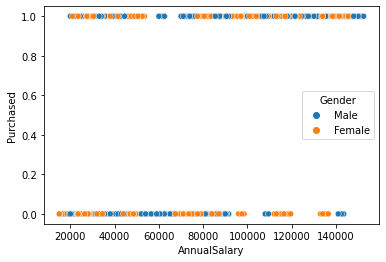

In [181]:
sns.scatterplot(x="AnnualSalary", y="Purchased",hue="Gender", data=car_data)

Generally income>Rs 75K(approx) buys a car with age > 35 years(approx) with most of them being female

In [182]:
car_data.replace(to_replace='Male',value='3',inplace=True)
car_data.replace(to_replace='Female',value='4',inplace=True)
car_data
t=car_data

Male=3 , Female =4 (say)

In [183]:
mod_data=car_data.loc[:,car_data.columns!='Purchased']
car_data=mod_data

In [184]:
mod_data=mod_data.loc[:,mod_data.columns!='User ID']
mod_data

,Gender,Age,AnnualSalary
0,3,35,20000
1,3,40,43500
2,3,49,74000
3,3,40,107500
4,3,25,79000
...,...,...,...
995,3,38,59000
996,4,47,23500
997,4,28,138500
998,4,48,134000


Convert purchased to y_train and y_test

In [185]:
t=pd.read_csv(path)
df = pd.DataFrame(t)
cols = [4]
y_set = df[df.columns[cols]]
y_set=y_set.to_numpy()


In [186]:
y_train=y_set[:699]
y_test=y_set[700:1000]
np.array(y_train)
np.array(y_test)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [187]:
mod_data = mod_data.apply(pd.to_numeric)
z=pd.DataFrame(mod_data)
x_set=z.to_numpy()
x_set

array([[     3,     35,  20000],
       [     3,     40,  43500],
       [     3,     49,  74000],
       ...,
       [     4,     28, 138500],
       [     4,     48, 134000],
       [     4,     44,  73500]], dtype=int64)

In [188]:
x_train=x_set[:699]
x_test=x_set[700:1000]

ALL SETS ARE READY>>>>MAKE NN and TRAIN


In [189]:
from tensorflow import losses

In [221]:
model=Sequential([
            Dense(3,input_shape=(3,),activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.001)),
            Dense(4,activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.001)),
            Dense(42,activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.001)),
            Dense(42,activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.001)),
            Dense(4,activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.001)),
            Dense(4,activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.001)),
            Dense(1,activation='sigmoid',activity_regularizer=tf.keras.regularizers.L2(0.00001))
                ])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [222]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 857us/step - loss: 1483397.2500 - accuracy: 0.4006
Epoch 2/100
22/22 [==============================] - 0s 810us/step - loss: 1121933.5000 - accuracy: 0.4006
Epoch 3/100
22/22 [==============================] - 0s 905us/step - loss: 900499.3125 - accuracy: 0.4006
Epoch 4/100
22/22 [==============================] - 0s 857us/step - loss: 743808.1875 - accuracy: 0.4006
Epoch 5/100
22/22 [==============================] - 0s 857us/step - loss: 622743.3750 - accuracy: 0.4006
Epoch 6/100
22/22 [==============================] - 0s 952us/step - loss: 522681.0000 - accuracy: 0.4006
Epoch 7/100
22/22 [==============================] - 0s 905us/step - loss: 440804.6562 - accuracy: 0.4006
Epoch 8/100
22/22 [==============================] - 0s 905us/step - loss: 373003.3438 - accuracy: 0.4006
Epoch 9/100
22/22 [==============================] - 0s 952us/step - loss: 315560.2812 - accuracy: 0.4006
Epoch 10/100
22/22 [========================

In [234]:
gender=str(input("Define Gender::M/F:"))
if(gender == "M"):
    p1=3
else:
    p1=4
age=int(input("EnterAge:"))
salary=int(input("Enter Annual Salary ($):"))
test=model.predict([[p1,age,salary]])
if(test>.5):
    print("Can buy a Car")
else:
    print("May not buy a Car")

1/1 [==============================] - 0s 23ms/step
May not buy a Car
